
# Multiple Linear Regression


the aim is to predict the weight of the fish

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [90]:
import seaborn as sns
from sklearn.model_selection import train_test_split

In [6]:
from sklearn.preprocessing import StandardScaler

In [8]:
import statsmodels.api as sm

In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [11]:
from sklearn.metrics import r2_score

In [25]:
#read the file

data = pd.read_csv("Fish.csv")
data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [26]:
#shape of the file 
data.shape

(159, 7)

In [27]:
#infoe of the file

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [28]:
data.describe(percentiles = [0.05,0.10,0.25,0.50,0.75,0.90,0.99])

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
5%,9.800000,11.300000,11.800000,13.100000,2.203560,1.283140
10%,29.580000,13.440000,14.620000,16.160000,3.764800,2.227840
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
90%,930.000000,38.200000,41.200000,45.340000,15.190400,6.742100


first we should understand our data properly

In [29]:
#lets check for null

data.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

there is no null data as we can see above

In [30]:
data.Species.value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

As we can see above we have 7 varieties of fish species

<AxesSubplot:xlabel='Species', ylabel='count'>

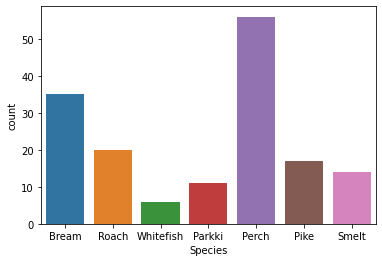

In [31]:
sns.countplot(data = data,x ="Species")

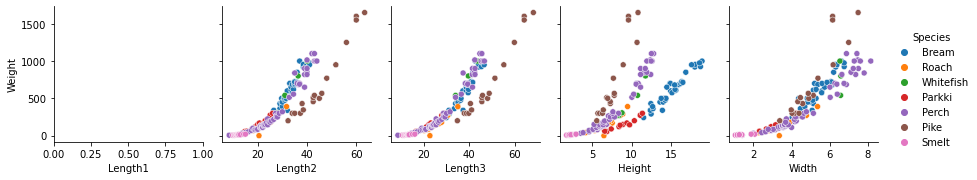

In [33]:
sns.pairplot(data= data , x_vars = ['Length1','Length2','Length3','Height','Width'], y_vars ="Weight" , hue = "Species")


As we see, our dependent variable-'weight' has linear relationship with all other variables.

<AxesSubplot:>

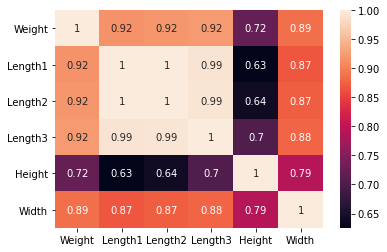

In [36]:
# let us check the correlation
sns.heatmap(data.corr(), annot = True)

we see there are high correlation between variables

1. Weight Column :

<AxesSubplot:xlabel='Weight'>

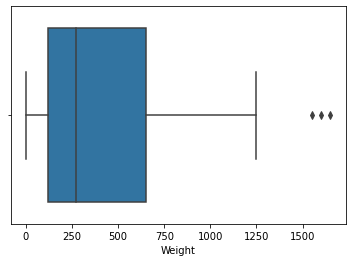

In [39]:
sns.boxplot(data["Weight"])

 we see a few outliers . Let us check the row with outliers value:

In [41]:
# checking the outlier rows
fish_weight = data['Weight']
Q3 = fish_weight.quantile(0.75)
Q1 = fish_weight.quantile(0.25)
IQR = Q3 - Q1
lower_limit = Q1 - (1.5*IQR)
upper_limit = Q3 + (1.5*IQR)

In [43]:
weight_outliers = fish_weight[(fish_weight <lower_limit) | (fish_weight >upper_limit)]
weight_outliers

142    1600.0
143    1550.0
144    1650.0
Name: Weight, dtype: float64

we can see there are three values 
these are the outliers in the weight column 

next lets check for other columns as well

Length 1 :

<AxesSubplot:xlabel='Length1'>

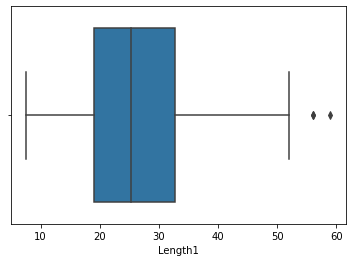

In [45]:
sns.boxplot(data ['Length1'])

In [46]:
# as we can see there a few outliers as well , lets check the rows as well

In [47]:
# to find the outliers

In [59]:

fish_length1 = data["Length1"]
Q3 = fish_length1.quantile(0.75)
Q1 = fish_length1.quantile(0.25)
IQR = Q3 - Q1

lower_limit = Q1 - (1.5*IQR)
upper_limit = Q3 + (1.5*IQR)
length1_outliers =fish_length1 [(fish_length1 < lower_limit)|(fish_length > upper_limit)]
length1_outliers

142    56.0
143    56.0
144    59.0
Name: Length1, dtype: float64

In [60]:
# we can see we have a few outliers now 

Length 2;

<AxesSubplot:xlabel='Length2'>

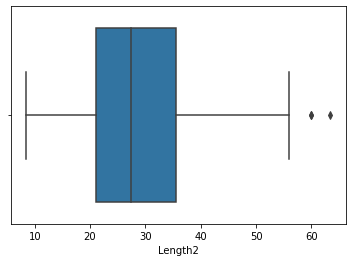

In [64]:
sns.boxplot(data["Length2"])

In [65]:
# we can see there are a few outliers as well


In [69]:
fish_length2 = data['Length2']
Q1 = fish_length.quantile(0.25)
Q3 = fish_length.quantile(0.75)

IQR = Q3 - Q1
upper_limit = Q3 + (1.5*IQR)
lower_limit = Q1 - (1.5*IQR)


In [70]:
length2_outliers = fish_length2[(fish_length2 < lower_limit)|(fish_length2 > upper_limit)]
length2_outliers

141    56.0
142    60.0
143    60.0
144    63.4
Name: Length2, dtype: float64

we can see there are a few outliers now

we will check for length 3

for Length 3 :

<AxesSubplot:xlabel='Length3'>

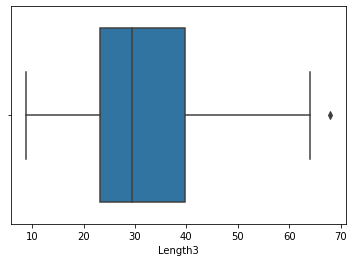

In [71]:
sns.boxplot(data["Length3"])

now we see some outliers here as well
now lets find them out


In [74]:
fish_length3 = data['Length3']
Q3 = fish_length3.quantile(0.75)
Q1 = fish_length3.quantile(0.25)
IQR = Q3- Q1
lower_limit = Q1 - (1.5*IQR)
upper_limit = Q3 + (1.5*IQR)


In [75]:
length3_outliers = fish_length3[(fish_length3<lower_limit)|(fish_length3>upper_limit)]
length3_outliers

144    68.0
Name: Length3, dtype: float64

lets check for height column now

Height :

<AxesSubplot:xlabel='Height'>

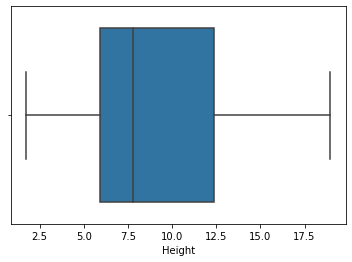

In [76]:
sns.boxplot(data["Height"])

there are no outliers in this column as we can see in this box plot above

check for width now

Width

<AxesSubplot:xlabel='Width'>

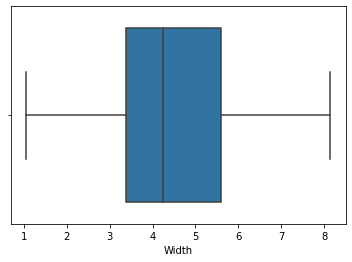

In [77]:
sns.boxplot(data["Width"])

there are no outliers in this column as well

we can observe that all ouliers of the dataset lies in rows from 142 to 144

In [79]:
data[142:145]

,Species,Weight,Length1,Length2,Length3,Height,Width
142,Pike,1600.0,56.0,60.0,64.0,9.600,6.144
143,Pike,1550.0,56.0,60.0,64.0,9.600,6.144
144,Pike,1650.0,59.0,63.4,68.0,10.812,7.480


In [80]:
#let us drop these rows:
df = data.drop([142,143,144])

In [81]:

# let us check our df after removal of outliers
df.describe(percentiles = [0.05,0.10,0.25,0.50,0.75,0.90,0.99])

,Weight,Length1,Length2,Length3,Height,Width
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,375.217308,25.655769,27.786538,30.571154,8.951128,4.375719
std,319.546978,9.119630,9.792651,10.695359,4.324325,1.672188
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
5%,9.800000,11.300000,11.800000,13.100000,2.202300,1.282150
10%,25.950000,13.350000,14.500000,16.100000,3.676000,2.167600
25%,120.000000,19.000000,21.000000,23.025000,5.931675,3.369600
50%,271.000000,25.000000,26.750000,29.250000,7.647800,4.243300
75%,612.500000,32.125000,35.000000,39.425000,12.378550,5.424375
90%,900.000000,37.200000,40.000000,44.350000,15.283250,6.685400


In [83]:

#creating dummies - to handle categorical variable.



species_dummies = pd.get_dummies(df['Species'], prefix = 'Species' , drop_first = True)

In [84]:
final_df = pd.concat([df,species_dummies], axis =1)
final_df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200,0,0,0,0,0,0
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056,0,0,0,0,0,0
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961,0,0,0,0,0,0
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555,0,0,0,0,0,0
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340,0,0,0,0,0,0


In [85]:

#dropping the original column as we have created dummies
final_df = final_df.drop(['Species'], axis =1)

In [86]:
final_df.shape

(156, 12)


Let us split the data into train and test data

In [91]:
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state =100)

In [92]:
df_train.shape

(109, 7)

In [93]:
df_test.shape

(47, 7)

Rescaling the data:
As we see columns with different place value. Let us rescale it:

In [94]:
scaler = StandardScaler()

In [95]:
scaling_columns = ['Weight', 'Length1','Length2','Length3','Height','Width']
df_train[scaling_columns] = scaler.fit_transform(df_train[scaling_columns])
df_train.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,1.090000e+02,1.090000e+02,1.090000e+02,1.090000e+02,1.090000e+02,1.090000e+02
mean,-1.212078e-16,-3.799204e-16,3.707534e-16,-2.093127e-16,-1.405603e-16,6.539112e-16
std,1.004619e+00,1.004619e+00,1.004619e+00,1.004619e+00,1.004619e+00,1.004619e+00
min,-1.199558e+00,-2.046666e+00,-2.041347e+00,-2.099509e+00,-1.717329e+00,-2.103873e+00
25%,-7.910930e-01,-7.223342e-01,-6.861065e-01,-6.849360e-01,-6.908023e-01,-5.914474e-01
50%,-2.541097e-01,-1.465376e-01,-1.483127e-01,-1.151774e-01,-2.821373e-01,-8.533238e-03
75%,7.124603e-01,7.401891e-01,7.659368e-01,8.376947e-01,6.820739e-01,6.026302e-01
max,2.717198e+00,2.651834e+00,2.615948e+00,2.448736e+00,2.425682e+00,2.183778e+00


Model building:

In [96]:
y_train = df_train['Weight']
X_train = df_train.iloc[:,2:7]

In [100]:
X_train.head()

,Length1,Length2,Length3,Height,Width
37,-0.895073,-0.922736,-0.881404,-0.774584,-0.911425
6,0.175908,0.249655,0.425111,1.333776,0.700756
25,0.751705,0.819716,1.053810,1.868102,1.226832
21,0.705641,0.712157,0.886812,1.778316,0.763163
114,1.062635,1.034834,0.906459,0.514217,1.370387



Let us initial build the model with statsmodel.api :

Model 1:

In [101]:
X_train_sm = sm.add_constant(X_train)
model1 = sm.OLS(y_train,X_train_sm).fit()

In [102]:
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     190.5
Date:                Sun, 13 Dec 2020   Prob (F-statistic):           2.21e-50
Time:                        22:51:48   Log-Likelihood:                -27.836
No. Observations:                 109   AIC:                             67.67
Df Residuals:                     103   BIC:                             83.82
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.589e-17      0.031  -2.47e-15      1.0

In [103]:
VIF = pd.DataFrame()
VIF['Features'] = X_train.columns
VIF['vif'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
VIF['vif'] = round(VIF['vif'] ,2)
VIF = VIF.sort_values(by='vif',ascending = False)
VIF

,Features,vif
1,Length2,1559.60
0,Length1,1264.50
2,Length3,285.85
3,Height,11.86
4,Width,10.33



Let us drop the column Length2 as it has high VIF and p-value.

Model 2:

In [104]:
X2 = X_train.drop(['Length2'], axis =1)
X2_sm = sm.add_constant(X2)

model2 = sm.OLS(y_train,X2_sm).fit()

In [105]:
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     231.0
Date:                Sun, 13 Dec 2020   Prob (F-statistic):           8.65e-51
Time:                        22:56:09   Log-Likelihood:                -29.797
No. Observations:                 109   AIC:                             69.59
Df Residuals:                     104   BIC:                             83.05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.589e-17      0.031  -2.43e-15      1.0

In [106]:
#vif
VIF = pd.DataFrame()
VIF['Features'] = X2.columns
VIF['vif'] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
VIF['vif'] = round(VIF['vif'] ,2)
VIF = VIF.sort_values(by='vif',ascending = False)
VIF

,Features,vif
1,Length3,242.95
0,Length1,225.81
2,Height,11.79
3,Width,9.18


Let us drop the column Length3 as it has high VIF.

Model 3:

In [108]:
X3 = X2.drop(['Length3'], axis =1)
X3_sm = sm.add_constant(X3)

model3 = sm.OLS(y_train,X3_sm).fit()

In [109]:
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     283.6
Date:                Sun, 13 Dec 2020   Prob (F-statistic):           3.43e-50
Time:                        22:59:37   Log-Likelihood:                -34.298
No. Observations:                 109   AIC:                             76.60
Df Residuals:                     105   BIC:                             87.36
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.589e-17      0.032  -2.35e-15      1.0

In [110]:
VIF = pd.DataFrame()
VIF['Features'] = X3.columns
VIF['vif'] = [variance_inflation_factor(X3.values, i) for i in range(X3.shape[1])]
VIF['vif'] = round(VIF['vif'] ,2)
VIF = VIF.sort_values(by='vif',ascending = False)
VIF

,Features,vif
2,Width,6.88
0,Length1,4.15
1,Height,2.82


Model 3 has all significant variables. All the VIF values and p-values are in a good range. Also the Adjusted R-squared is 88.7%. This model is explaining most of the variance without being too complex.

So our equation is:

Weight = 0.00000000000000000633 + 0.4184 Length1 + Height 0.2538 + Width * 0.3512
Residual analysis:

In [111]:
y_train_pred = model3.predict(X3_sm)
y_train_pred.head()

37    -0.891215
6      0.658271
25     1.219574
21     1.014653
114    1.056440
dtype: float64

<AxesSubplot:ylabel='Density'>

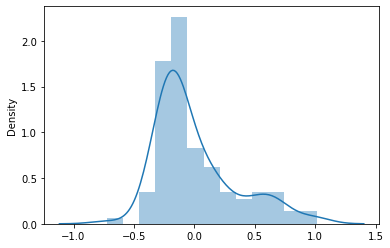

In [112]:
residual = y_train - y_train_pred
sns.distplot(residual)

Error term is normally distributed.

Text(0.5, 1.0, 'Test(Blue) vs pred(Red)')

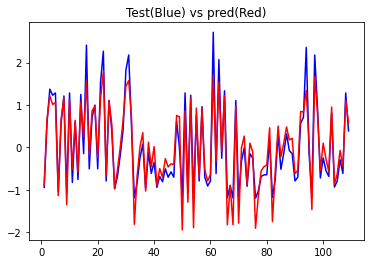

In [114]:
#plotting y_train and y_train_pred
c = [i for i in range(1,110,1)]
plt.plot(c, y_train,color = 'Blue')
plt.plot(c, y_train_pred,color = 'red')
plt.title('Test(Blue) vs pred(Red)')

Looking at the graph we see that, the peak values are not explained properly by the model.

Making Predictions:

In [115]:
# treating test columns same way as train dataset
df_test[scaling_columns] = scaler.transform(df_test[scaling_columns])
df_test.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
mean,0.406783,0.146506,0.145529,0.129990,0.174519,0.291103
std,1.386265,1.153926,1.163420,1.156686,1.179970,1.383755
min,-1.220680,-1.839380,-1.890765,-1.903040,-1.714780,-2.172324
25%,-0.800043,-0.716576,-0.696862,-0.724230,-0.602990,-0.592772
50%,-0.146713,0.072265,0.066805,0.100938,-0.101342,0.060053
75%,1.750628,1.045361,1.115503,1.098015,0.933590,1.590203
max,3.254181,3.077923,3.078450,2.900614,2.504489,2.645274


In [116]:
y_test = df_test['Weight']
X_test = df_test.iloc[:,2:7]

In [117]:
cols = X3.columns
cols

Index(['Length1', 'Height', 'Width'], dtype='object')

In [118]:
# considering only those columns which was part of our model 3.
X_test = X_test[cols]
X_test.columns

Index(['Length1', 'Height', 'Width'], dtype='object')

In [119]:

#predicting
X_test_sm = sm.add_constant(X_test)
y_pred = model3.predict(X_test_sm)

In [120]:
y_pred.head()

45    -0.437544
11     0.651100
122    1.287522
15     0.933728
127    1.794807
dtype: float64

In [121]:
r_square = r2_score(y_test,y_pred)
r_square

0.8839914021264155

Our Adj.R-square for train set is 88.7% and R-square for test set is 88.39%.

Text(0.5, 1.0, 'Test(Blue) vs pred(Red)')

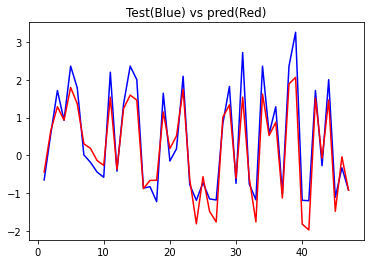

In [122]:
#plotting y_test and y_pred
c = [i for i in range(1,48,1)]
plt.plot(c, y_test,color = 'Blue')
plt.plot(c, y_pred,color = 'red')
plt.title('Test(Blue) vs pred(Red)')

From the above graph we see that- lower and upper tips are not predicted properly by the model.